# This notebook contains the Stacks parameter tests, final scripts used and analyses to identify sex linked markers for the ddRADseq dataset of <i>Rana dybowskii</i> 
## Sample set:

### 1 locations (Jeonju province, South Korea. 35.787719°, 127.139270°)

31 samples:  
- 13 females
- 18 males
 

In [35]:
%matplotlib inline
import os
import Incremental_U as IncU 
import Incremental_C as IncC
import Incremental_Pop_mod as IncPop
import MISC_RAD_tools as MISC
import pprint
import subprocess

In [36]:
%load_ext rpy2.ipython

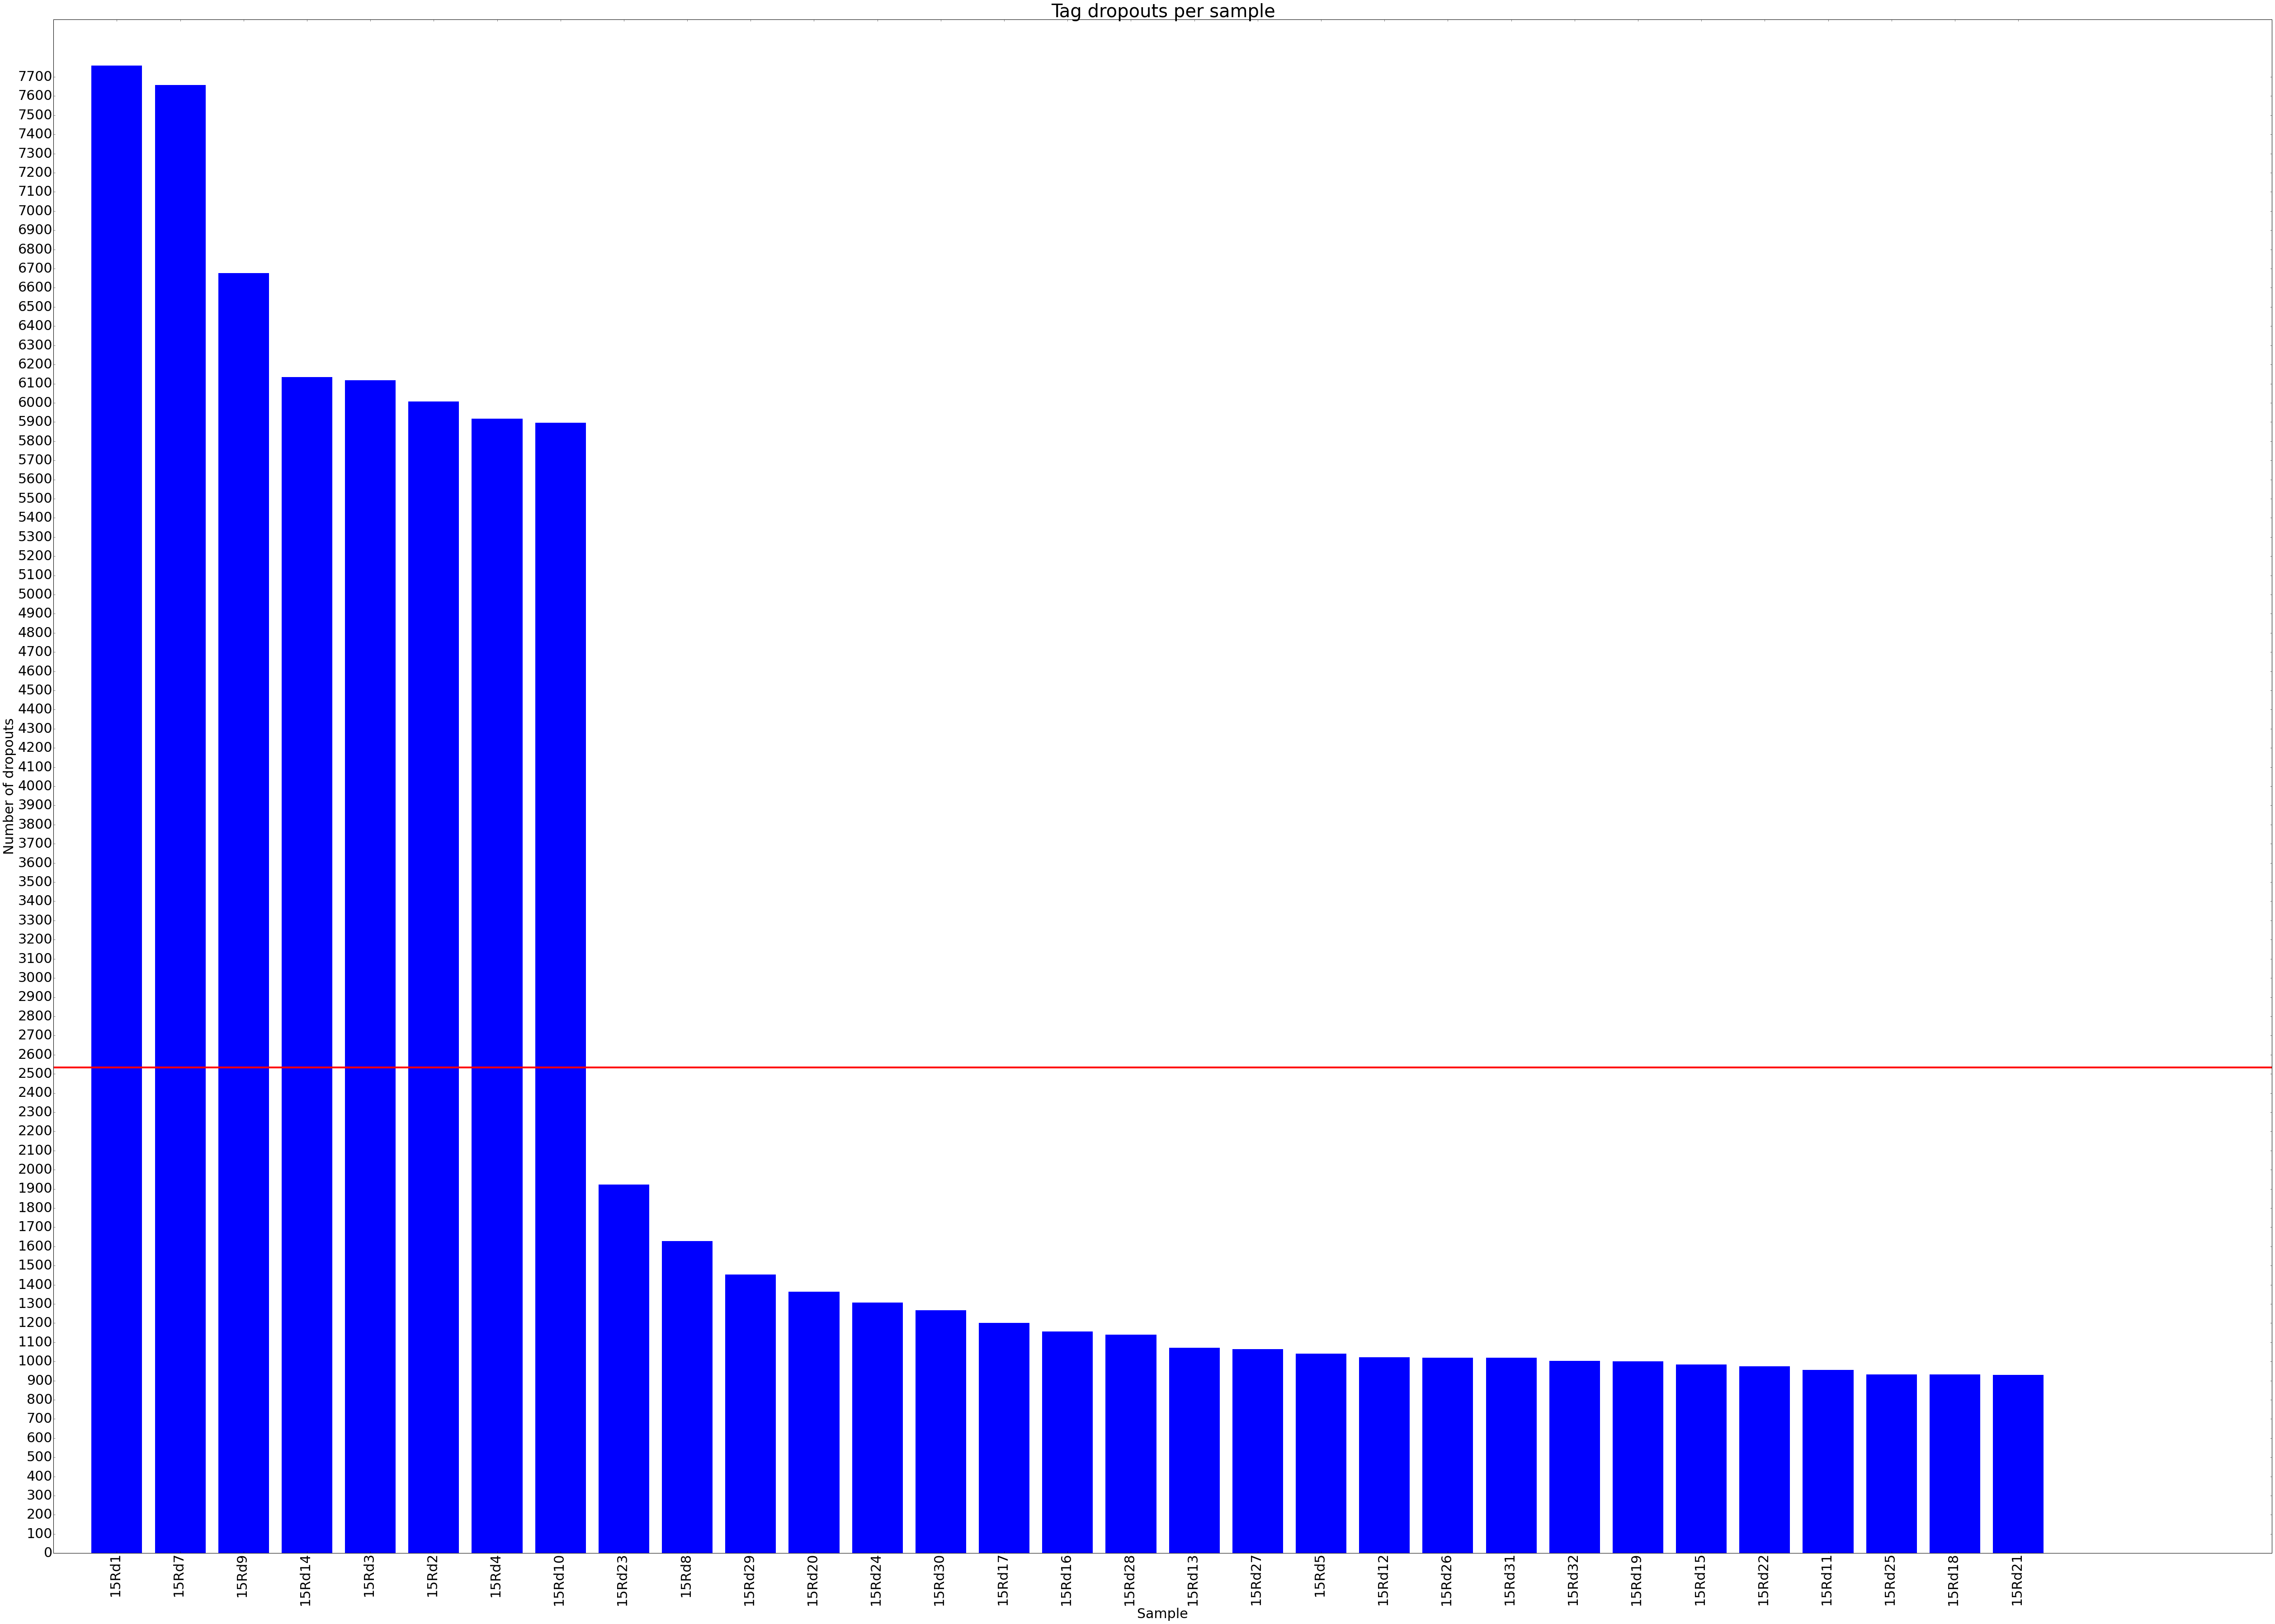

Outputs written to:
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_all//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_all//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_all//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_all//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_all//blacklist.txt


In [3]:
wd = "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_all/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

So lets get rid of these very bad samples:

Rd1  
Rd7  
Rd9  
Rd14  
Rd3  
Rd2  
Rd4  
Rd10

Still leaves 9 females, 14 males

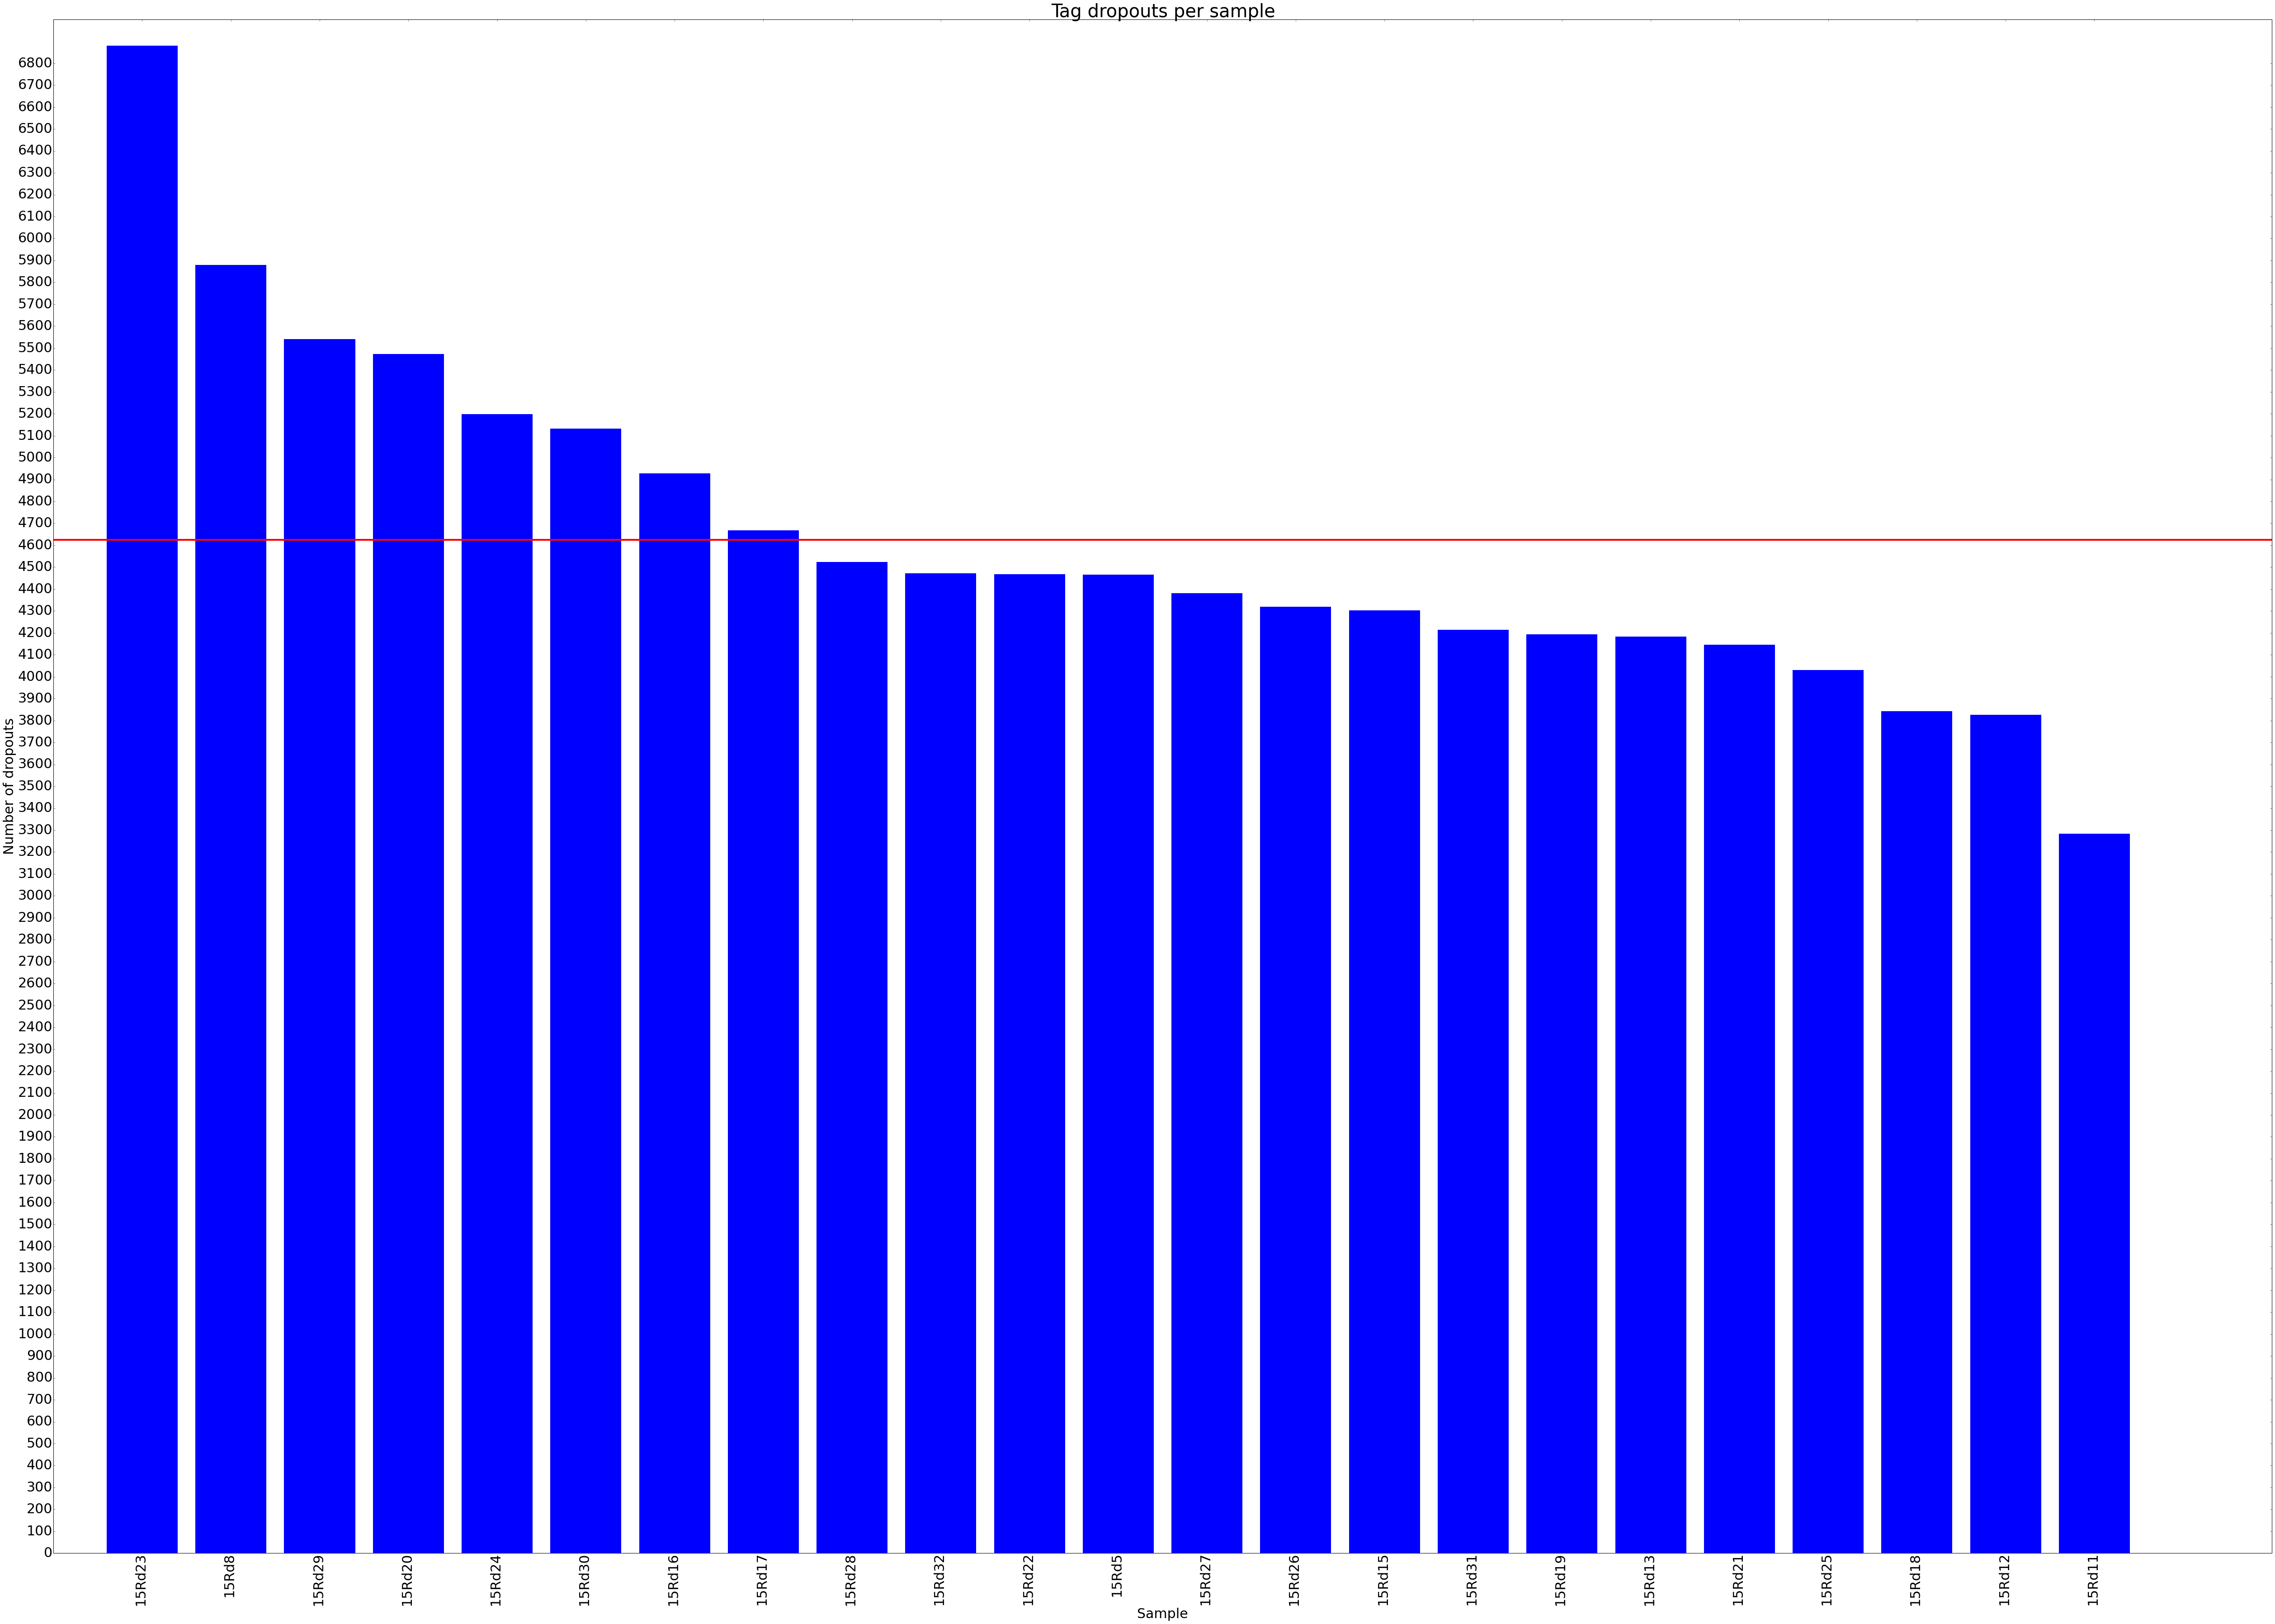

Outputs written to:
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept//blacklist.txt


In [4]:
wd = "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)


Think about removing further samples:

Rche_150  
Rche_218  
Rche_204  
Rche_196  
Rche_188  
Rche_221  
Rche_167  
Rche_197  
Rche_198  

### Now run a PCA using all loci to look at the (mostly) neutral structure in the data

In [5]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept/  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept//batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept//batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept//batch_1_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept//batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept//batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept//batch_1_altered_adegenet_plink-temporary.fam
written.
69147 variants loaded from .bim file.
23 people (0 males, 0 females, 23

In [6]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("../sex_info_kept.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 



/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: ade4

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
   /// adegenet 2.0.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()



  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Saving 19.7 x 19.7 in image

  warnings.warn(x, RRuntimeWarning)


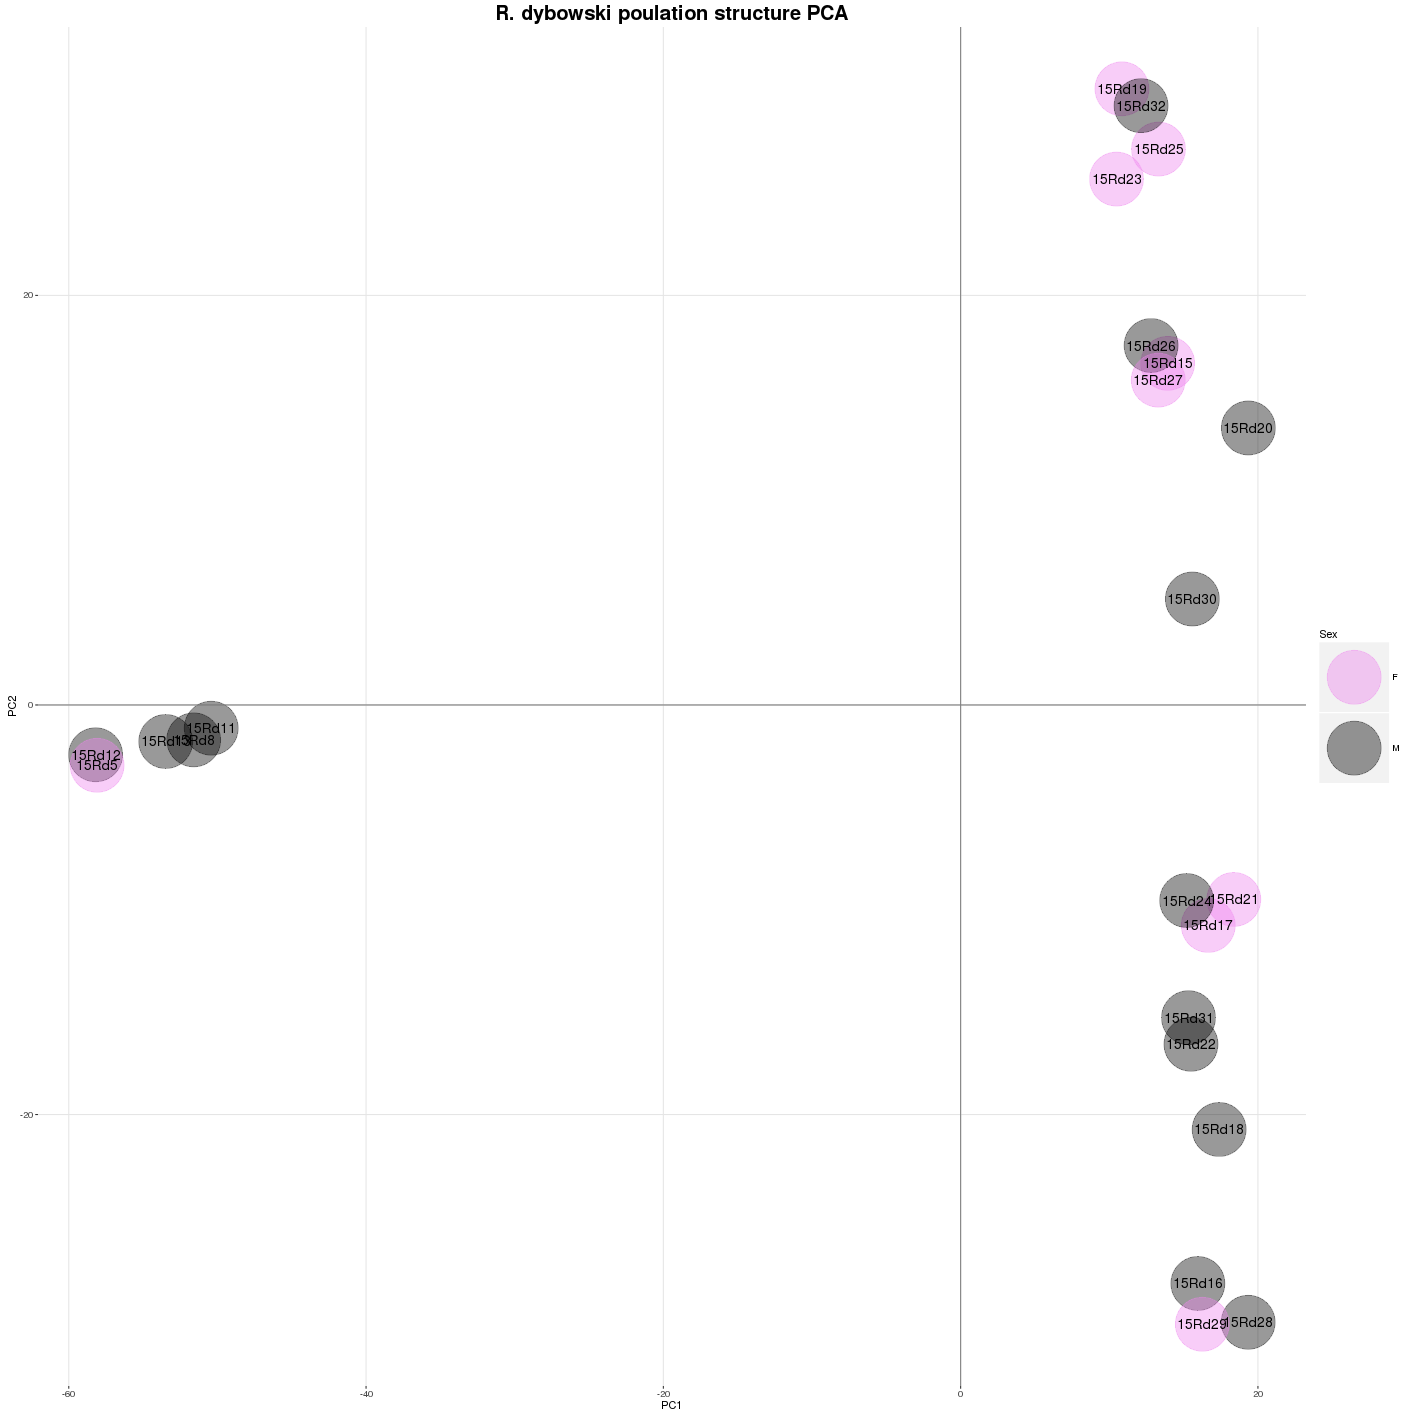

In [7]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. dybowski poulation structure PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

Ok, so there are some samples that fall apart from the others, although the should all come from the same species. Lets see how this dataset performs first and remove these samples if needed

### Now find sex linked markers using the 3 approaches in Brelsford & Lavanchy et al (2016)

In [68]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 69147
Number of samples = 23
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 69146
Number of putative X linked snps = 37
Number of putative X linked tags = 37
Number of putative Z linked markers = 15
Number of putative Z linked tags = 15


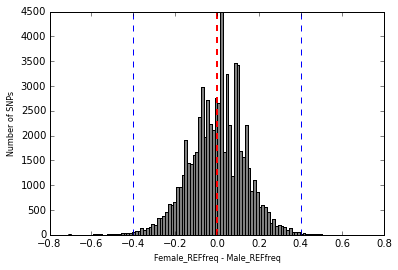


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 69147
Number of samples = 23
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 69146
Number of putative X linked snps = 17
Number of putative X linked tags = 17
Number of putative Z linked markers = 11
Number of putative Z linked tags = 11

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 9
Number of males: 14
Number of Putative Y linked tags: 38
Number of Putative W linked tags: 11

 ### DONE! ###



KeyboardInterrupt: 

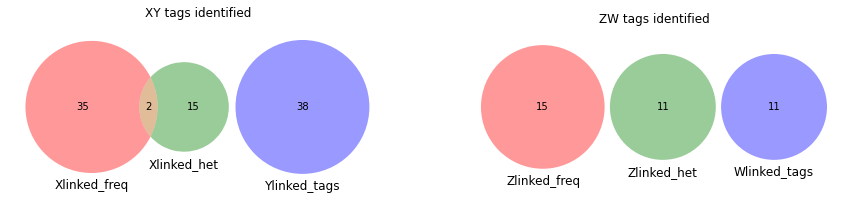

In [69]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

Number of tags =  70934
Average tag coverage 20.0424706221 (+- 9.72211225132 )


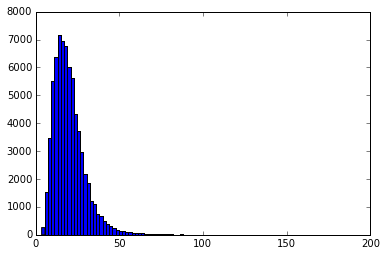

In [1]:
%matplotlib inline
import MISC_RAD_tools as MISC
wd = "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2_clean"
final_vcf = "%s/batch_1.vcf" % wd
MISC.av_tag_cov(final_vcf, "%s/Av_tag_cov.out" % wd)
#MISC.sample_Avcov_from_vcf(final_vcf)

In [74]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2_clean/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Sex_ID_info_kept_2.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.7 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 70934
Number of samples = 18
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 70933
Number of putative X linked snps = 101
Number of putative X linked tags = 101
Number of putative Z linked markers = 69
Number of putative Z linked tags = 69


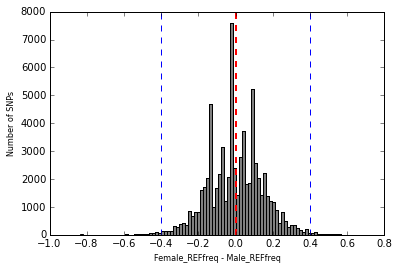


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 70934
Number of samples = 18
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 70933
Number of putative X linked snps = 98
Number of putative X linked tags = 98
Number of putative Z linked markers = 56
Number of putative Z linked tags = 56

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 8
Number of males: 10
Number of Putative Y linked tags: 7
Number of Putative W linked tags: 1

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rdybowskii/Stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 196
Final number of ZW tags = 124


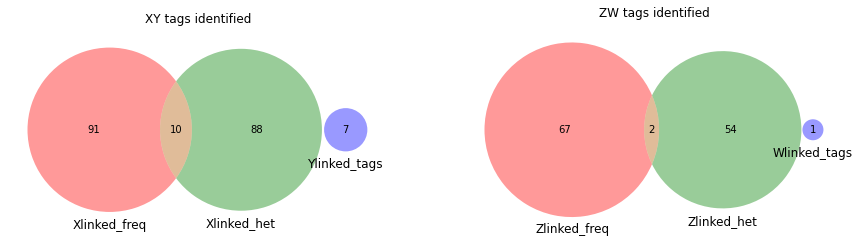

In [75]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

Still not much better, but this is a pretty good dataset, there's a ton of markers and a decent number of males and females. Maybe there are some misassignments? I think I need a couple of PCAs to see whats going on here - any remaining pop structure, and any male female signal at the loci that have been found?

### Pop structure. . . 

In [17]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2/  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2//batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2//batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2//batch_1_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2//batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2//batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2//batch_1_altered_adegenet_plink-temporary.fam
written.
71463 variants loaded from .bim file.
18 people (0 males, 0

In [18]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("../sex_info_kept_2.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 




 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



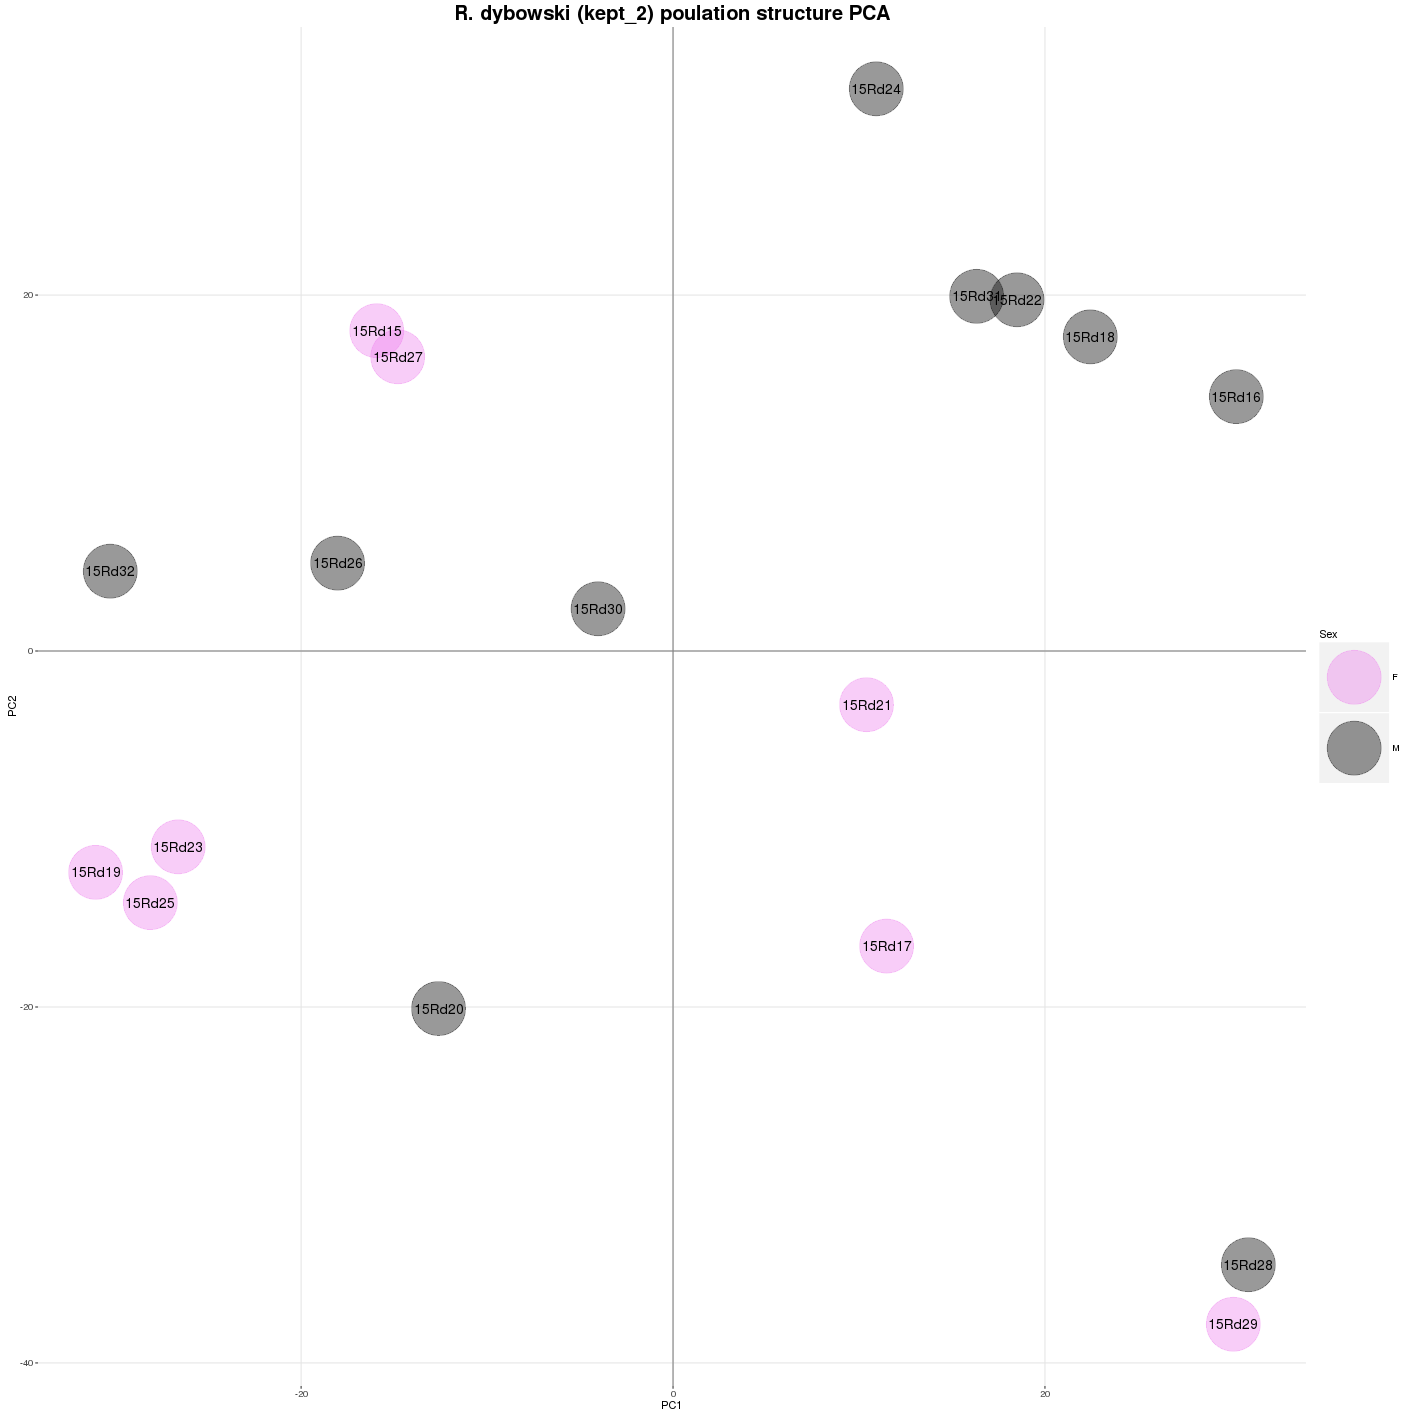

In [19]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. dybowski (kept_2) poulation structure PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

### XY linked only

In [22]:
vcf_path = "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2/batch_1.vcf"
MISC.filter_vcf(vcf_path, XYset , "XY_linked_snps_freq_het.vcf")

In [23]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2/  ## just change this line

## All data 
sed 's/_/-/g' $wd/XY_linked_snps_freq_het.vcf > $wd/XY_linked_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/XY_linked_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2//XY_linked_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2//XY_linked_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2//XY_linked_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2//XY_linked_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2//XY_linked_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2//XY_linked_altered_adegenet_plink-temporary.fam
written.
189 variants loaded from .bim file.
18 people (

In [24]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('XY_linked_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("../sex_info_kept_2.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 




 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



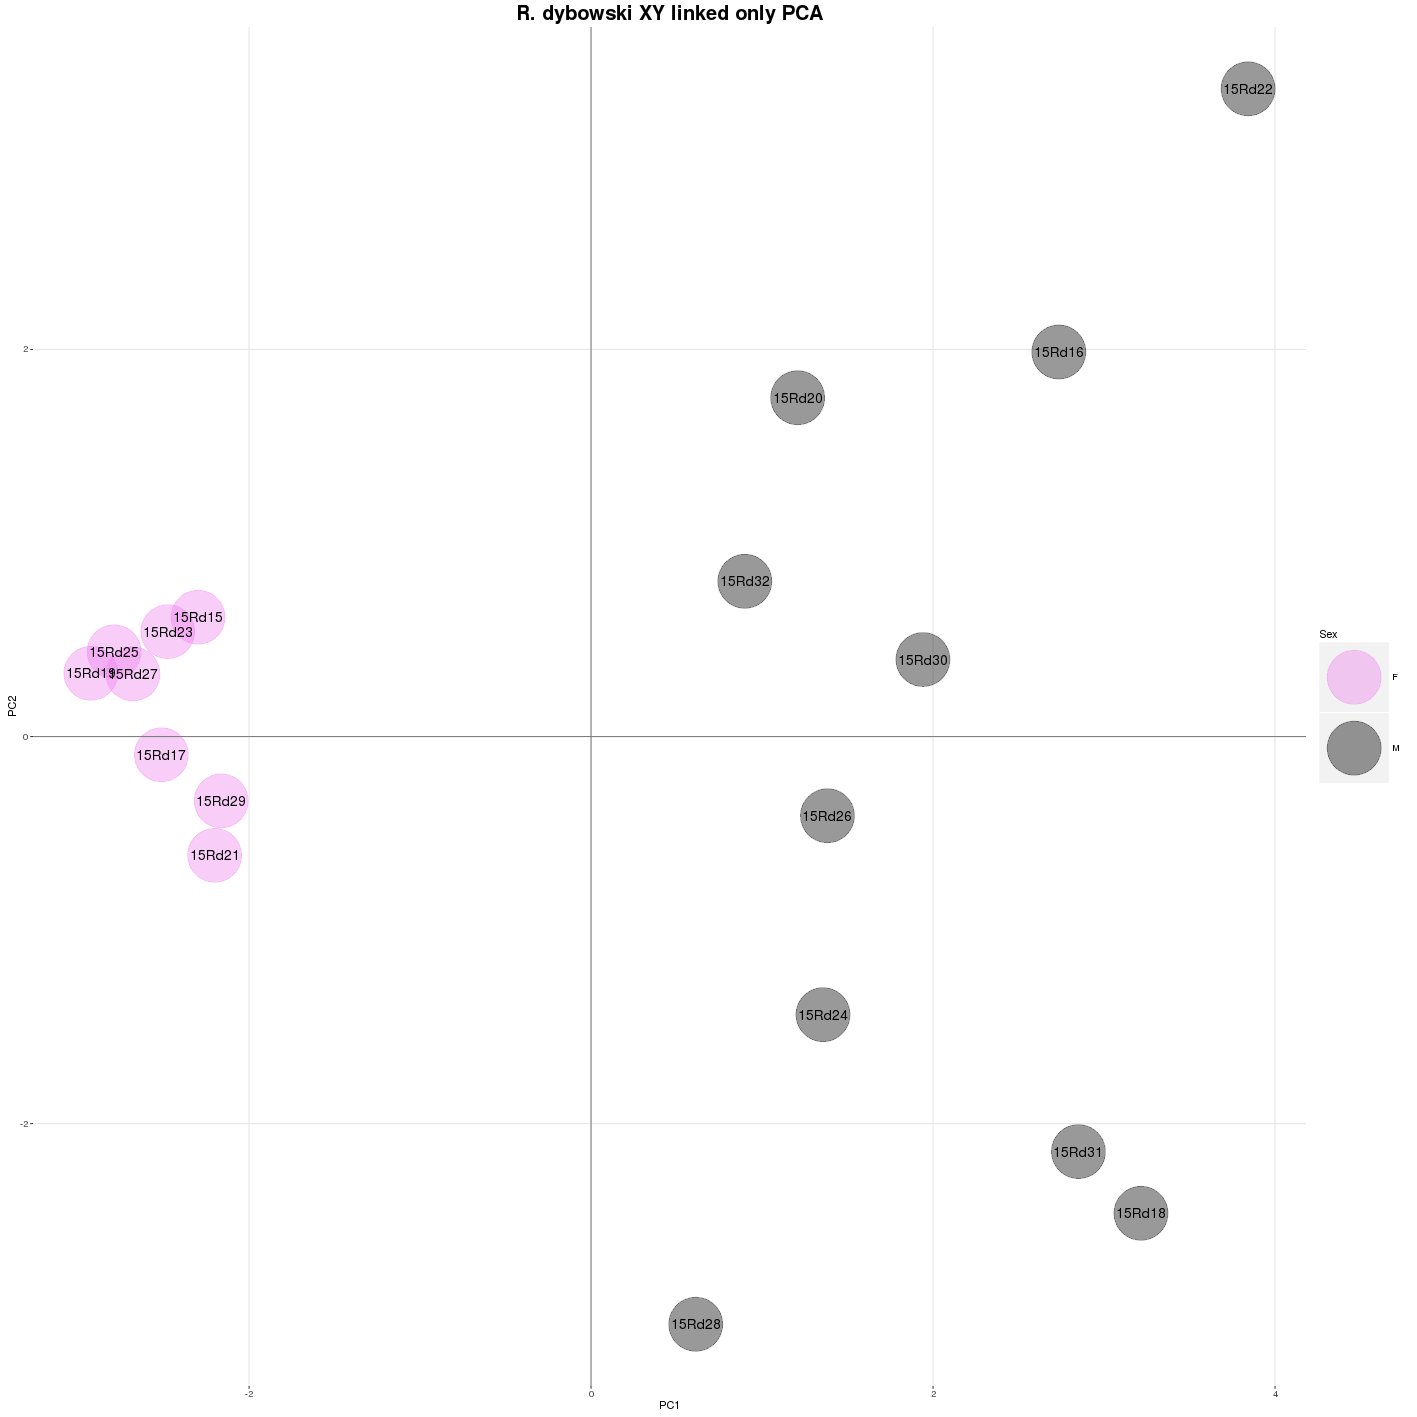

In [25]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. dybowski XY linked only PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

SO, the problem could be that there is just a lot of Y diversity in this population. Indeed these males are spread over a large spectrum. 

This XY loci set needs some validation. P-value and consistency of chromosome they map to will be key.



## Summary

Best I can do is:
 - XY tags = 189
 - ZW tags = 123
 
My hunch is that there is a lot of Y diversity, but I cannot validate this until I see where these sex linked markers map. I should also do a validation mapping the ZW tags, to check that they really are false positives (i.e. they should map all over the genome).


### Different approach - map everything to the ordered temporaria genome and plot PCA's for each chromosome . . . 

In [16]:
from Bio.Blast.Applications import NcbiblastnCommandline

In [12]:
R_dyb_VCF = open("/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2_clean/batch_1.vcf.altered", 'r').readlines()
catalog = "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/batch_1.catalog.tags.tsv.gz"

tags = []

for line in R_dyb_VCF:
    if not line.startswith("#"):
        tag_ID = line.split()[2]
        if tag_ID not in tags:
            tags.append(tag_ID)
            
MISC.fasta_maka(tags, catalog)

Number of tags in whitelist: 41328
41328 sequences written to /home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Whitelist_tags.fa


In [14]:
tag_fasta_path = "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2_clean/VCF_tags.fa"
Rtemp_Genome_fasta = "/home/djeffrie/Data/RADseq/R_temp_fams/Genome_mapping/Final_map_files/Final_ordered_Rtemp_scaffolds/Rtemp_Linkage_map_ordered_scaffolds_XenIDs.fasta"
Rtemp_Genome_db = "/home/djeffrie/Data/RADseq/R_temp_fams/Genome_mapping/Final_map_files/Final_ordered_Rtemp_scaffolds/Rtemp_Linkage_map_ordered_scaffolds_XenIDs_blastn_db"
blast_out_path = "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2_clean/vcf_tags_bastouts.xml"

best_hit_crit = 1e-10
Eval_threshold = 1e-30
Window = 2000
threads = 7

In [17]:
blastn_cline = NcbiblastnCommandline(query=tag_fasta_path, db=Rtemp_Genome_db, outfmt=5, out=blast_out_path, num_threads=threads)
stdout, stderr = blastn_cline()

blastn_out_records = MISC.BlastParseExtra(blast_out_path, Rtemp_Genome_fasta , best_hit_crit, Eval_threshold,Window)

Number of multi-alingments kept: 355
Number of unique alingments kept: 1725
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/R_temp_fams/Genome_mapping/Final_map_files/Final_ordered_Rtemp_scaffolds/Rtemp_Linkage_map_ordered_scaffolds_XenIDs.fasta . . . 
0 sequence scaffold segments are in /home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2_clean/blast_2000_chunks.fa


In [18]:
blastn_out_records

{u'19823': {'Evalue': 2.57364e-37,
  'Hit_end_coord': 49187,
  'Hit_start_coord': 49279,
  'Ref_hit_id': 'Xen_Chr02_Rtemp_scaffold1960.1|size121904 scaffold1960.1|size121904'},
 u'127879': {'Evalue': 2.59191e-32,
  'Hit_end_coord': 41112,
  'Hit_start_coord': 41204,
  'Ref_hit_id': 'Xen_Chr01_Rtemp_scaffold11871.1|size57641 scaffold11871.1|size57641'},
 u'165283': {'Evalue': 2.59191e-32,
  'Hit_end_coord': 12339,
  'Hit_start_coord': 12431,
  'Ref_hit_id': 'Xen_Chr06_Rtemp_scaffold5508.1|size80120 scaffold5508.1|size80120'},
 u'126878': {'Evalue': 1.1974e-35,
  'Hit_end_coord': 20822,
  'Hit_start_coord': 20729,
  'Ref_hit_id': 'Xen_Chr08_Rtemp_scaffold65505.1|size21958 scaffold65505.1|size21958'},
 u'23441': {'Evalue': 2.5555e-42,
  'Hit_end_coord': 1003028,
  'Hit_start_coord': 1003120,
  'Ref_hit_id': 'Xen_Chr06_Rtemp_scaffold3.1|size1040989 scaffold3.1|size1040989'},
 u'172553': {'Evalue': 1.1974e-35,
  'Hit_end_coord': 93444,
  'Hit_start_coord': 93352,
  'Ref_hit_id': 'Xen_Chr02_

In [60]:
Xen_chrom = "Chr05"
Chrom_tags = []
for tagID in blastn_out_records:
    Xen_chr = blastn_out_records[tagID]["Ref_hit_id"].split("_")[1]

    if Xen_chr == Xen_chrom:
        Chrom_tags.append(tagID)

In [55]:
sorted(Chrom_tags)

[u'10077',
 u'10138',
 u'102998',
 u'10366',
 u'106853',
 u'109228',
 u'116936',
 u'11961',
 u'11999',
 u'120335',
 u'123087',
 u'123155',
 u'123840',
 u'124024',
 u'124942',
 u'125651',
 u'126281',
 u'127292',
 u'127554',
 u'128474',
 u'130754',
 u'130757',
 u'131670',
 u'132840',
 u'132867',
 u'134730',
 u'135275',
 u'135488',
 u'137310',
 u'139028',
 u'139052',
 u'139677',
 u'13969',
 u'140015',
 u'141206',
 u'141545',
 u'142274',
 u'142666',
 u'143981',
 u'146007',
 u'147535',
 u'148813',
 u'148947',
 u'14992',
 u'151113',
 u'151308',
 u'151462',
 u'151579',
 u'151877',
 u'152537',
 u'154450',
 u'154802',
 u'155059',
 u'155514',
 u'156188',
 u'156978',
 u'159517',
 u'159911',
 u'160143',
 u'162447',
 u'162465',
 u'163074',
 u'164462',
 u'164603',
 u'165389',
 u'165608',
 u'166948',
 u'167052',
 u'167907',
 u'168504',
 u'169311',
 u'169524',
 u'169530',
 u'169855',
 u'169959',
 u'170259',
 u'170435',
 u'1707',
 u'173329',
 u'175643',
 u'177173',
 u'180780',
 u'182053',
 u'182705',
 

In [56]:
vcf_path = "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2_clean/batch_1.vcf.altered"
MISC.filter_vcf_tag_ID_only(vcf_path, Chrom_tags , "%s.vcf" % Xen_chrom)

In [57]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2_clean/  ## just change this line

## All data 
sed 's/_/-/g' $wd/Chr04.vcf > $wd/Chr04_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/Chr03_adegenet.vcf --recode A --allow-extra-chr -out $wd/Chr04_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2_clean//Chr04_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2_clean//Chr04_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2_clean//Chr03_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2_clean//Chr04_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2_clean//Chr04_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2_clean//Chr04_adegenet_plink-temporary.fam
written.
474 variants loaded from .bim file.
18 people (0 males, 0 females, 18 ambiguous) lo

In [65]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.R")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2_clean/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('Chr02_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("../sex_info_kept_2.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 




 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



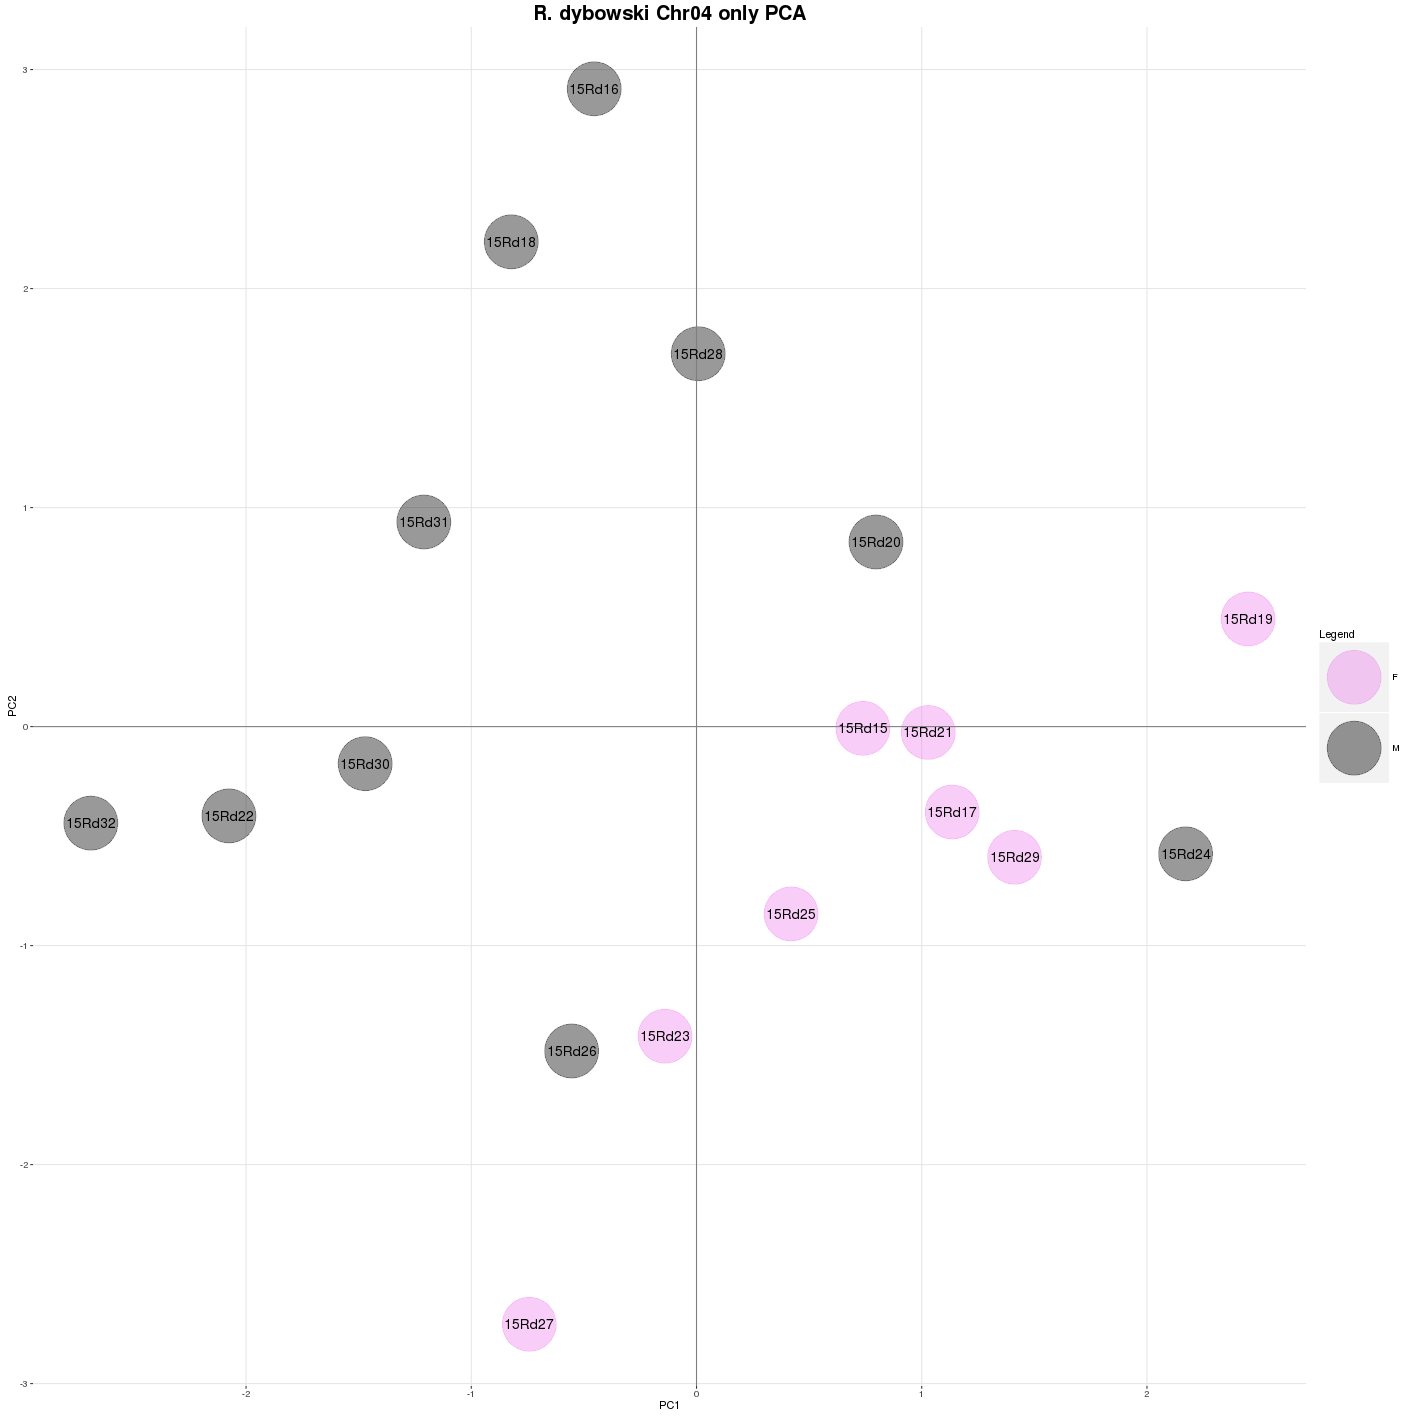

In [67]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(3,4), ## which components to plot
           Title = "R. dybowski Chr04 only PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use